In [175]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import seaborn as sns
from itertools import combinations

In [193]:
tickers = ['AAPL', 'MSFT', 'NVDA', 'GOOGL', 'AMZN']
start_date = '2019-01-01'
end_date = '2024-08-31'

# Download data for multiple tickers
stock_data = yf.download(tickers, start=start_date, end=end_date)

# Display the first few rows of the DataFrame
print(stock_data.head())

[*********************100%***********************]  5 of 5 completed

Price                      Adj Close                                   \
Ticker                          AAPL       AMZN      GOOGL       MSFT   
Date                                                                    
2019-01-02 00:00:00+00:00  37.750084  76.956497  52.673550  95.501335   
2019-01-03 00:00:00+00:00  33.989895  75.014000  51.214722  91.988014   
2019-01-04 00:00:00+00:00  35.440903  78.769501  53.841705  96.266312   
2019-01-07 00:00:00+00:00  35.362019  81.475502  53.734329  96.389084   
2019-01-08 00:00:00+00:00  36.036125  82.829002  54.206287  97.087990   

Price                                    Close                        \
Ticker                         NVDA       AAPL       AMZN      GOOGL   
Date                                                                   
2019-01-02 00:00:00+00:00  3.378612  39.480000  76.956497  52.734001   
2019-01-03 00:00:00+00:00  3.174486  35.547501  75.014000  51.273499   
2019-01-04 00:00:00+00:00  3.377868  37.064999  78.7695

In [194]:
stock_data.head()

Price                      Adj Close                                   \
Ticker                          AAPL       AMZN      GOOGL       MSFT   
Date                                                                    
2019-01-02 00:00:00+00:00  37.750084  76.956497  52.673550  95.501335   
2019-01-03 00:00:00+00:00  33.989895  75.014000  51.214722  91.988014   
2019-01-04 00:00:00+00:00  35.440903  78.769501  53.841705  96.266312   
2019-01-07 00:00:00+00:00  35.362019  81.475502  53.734329  96.389084   
2019-01-08 00:00:00+00:00  36.036125  82.829002  54.206287  97.087990   

Price                                    Close                        \
Ticker                         NVDA       AAPL       AMZN      GOOGL   
Date                                                                   
2019-01-02 00:00:00+00:00  3.378612  39.480000  76.956497  52.734001   
2019-01-03 00:00:00+00:00  3.174486  35.547501  75.014000  51.273499   
2019-01-04 00:00:00+00:00  3.377868  37.064999  78.769501  53.903500   
2019-01-07 00:00:00+00:00  3.556695  36.982498  81.475502  53.796001   
2019-01-08 00:00:00+00:00  3.468149  37.687500  82.829002  54.268501   

Price                                           ...       Open             \
Ticker                           MSFT     NVDA  ...       AAPL       AMZN   
Date                                            ...                         
2019-01-02 00:00:00+00:00  101.120003  3.40550  ...  38.722500  73.260002   
2019-01-03 00:00:00+00:00   97.400002  3.19975  ...  35.994999  76.000504   
2019-01-04 00:00:00+00:00  101.930000  3.40475  ...  36.132500  76.500000   
2019-01-07 00:00:00+00:00  102.059998  3.58500  ...  37.174999  80.115501   
2019-01-08 00:00:00+00:00  102.800003  3.49575  ...  37.389999  83.234497   

Price                                                         Volume  \
Ticker                         GOOGL        MSFT     NVDA       AAPL   
Date                                                                   
2019-01-02 00:00:00+00:00  51.360001   99.550003  3.26600  148158800   
2019-01-03 00:00:00+00:00  52.533501  100.099998  3.34475  365248800   
2019-01-04 00:00:00+00:00  52.127998   99.720001  3.27350  234428400   
2019-01-07 00:00:00+00:00  54.048500  101.639999  3.46250  219111200   
2019-01-08 00:00:00+00:00  54.299999  103.040001  3.66725  164101200   

Price                                                                
Ticker                          AMZN     GOOGL      MSFT       NVDA  
Date                                                                 
2019-01-02 00:00:00+00:00  159662000  31868000  35329300  508752000  
2019-01-03 00:00:00+00:00  139512000  41960000  42579100  705552000  
2019-01-04 00:00:00+00:00  183652000  46022000  44060600  585620000  
2019-01-07 00:00:00+00:00  159864000  47446000  35656100  709160000  
2019-01-08 00:00:00+00:00  177628000  35414000  31514400  786016000  

[5 rows x 30 columns]

In [195]:
adj_close = stock_data['Adj Close']

In [196]:
adj_close.columns

Index(['AAPL', 'AMZN', 'GOOGL', 'MSFT', 'NVDA'], dtype='object', name='Ticker')

In [197]:
adj_close.head()

Ticker,AAPL,AMZN,GOOGL,MSFT,NVDA
Date,,,,,
2019-01-02 00:00:00+00:00,37.750084,76.956497,52.673550,95.501335,3.378612
2019-01-03 00:00:00+00:00,33.989895,75.014000,51.214722,91.988014,3.174486
2019-01-04 00:00:00+00:00,35.440903,78.769501,53.841705,96.266312,3.377868
2019-01-07 00:00:00+00:00,35.362019,81.475502,53.734329,96.389084,3.556695
2019-01-08 00:00:00+00:00,36.036125,82.829002,54.206287,97.087990,3.468149


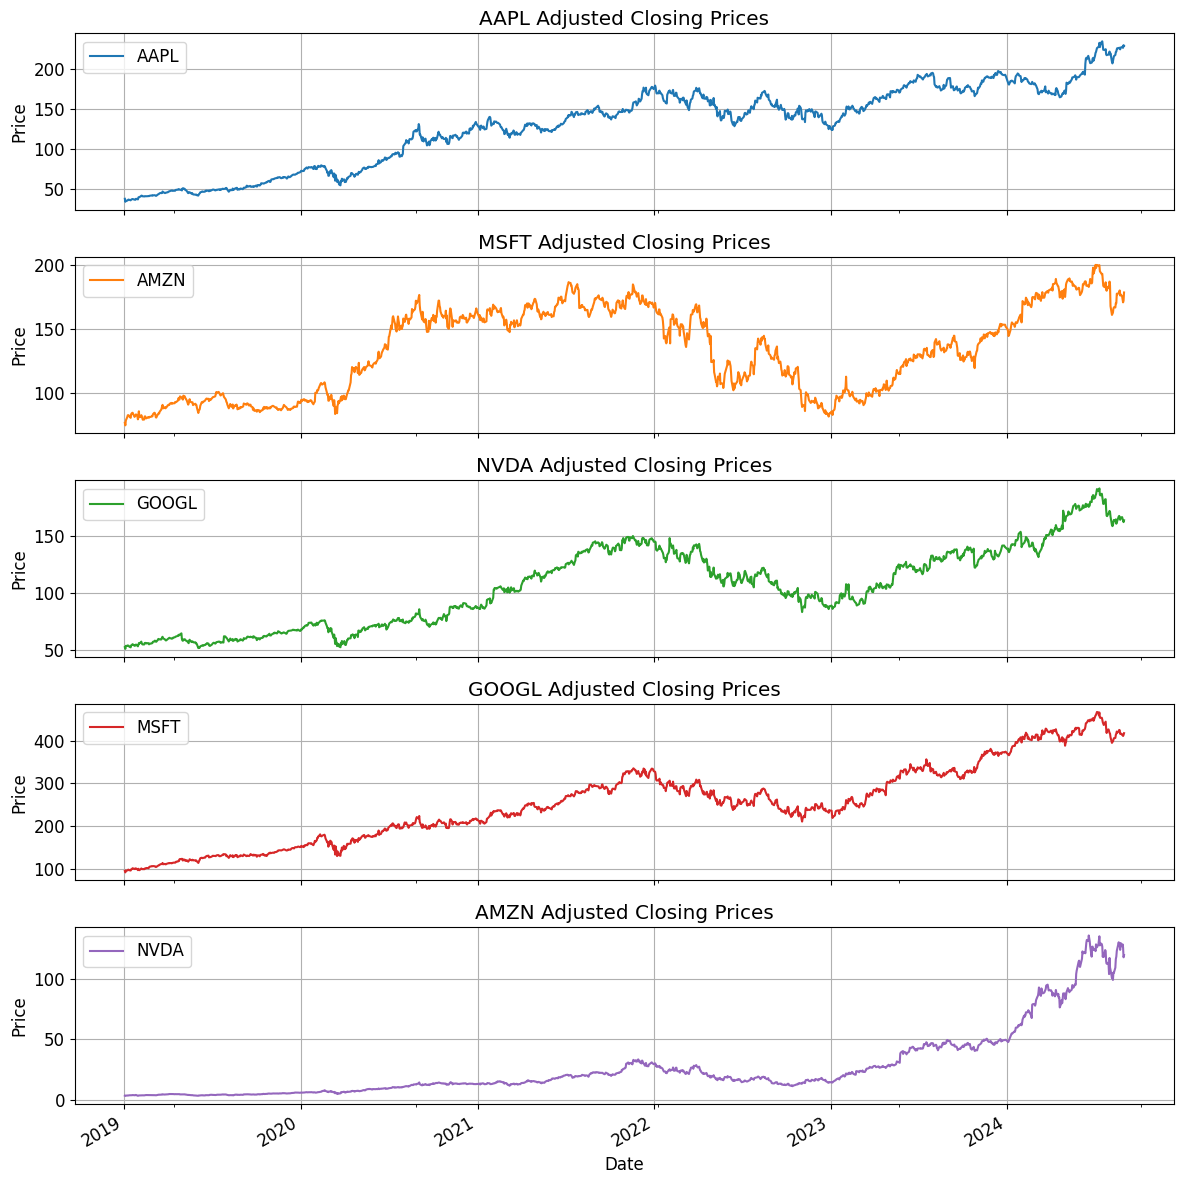

In [198]:
fig = adj_close.plot(kind = 'line', figsize = (12,12), subplots = True );

for i, ticker in enumerate(tickers):
    fig[i].set_title(f'{ticker} Adjusted Closing Prices')
    fig[i].set_ylabel('Price')
    fig[i].grid(True)

# Set a common x-label and adjust layout
plt.xlabel('Date')
plt.tight_layout()

# Display the plots
plt.show()

### Trend Analysis

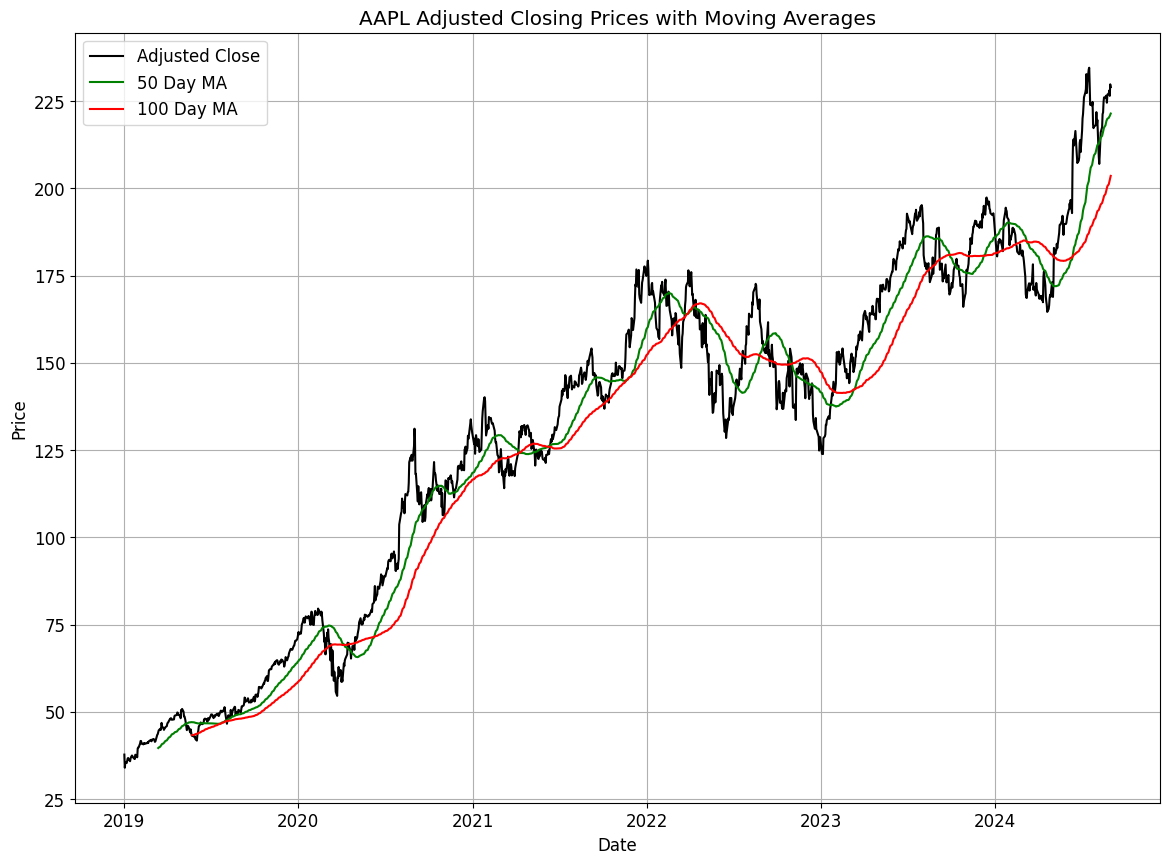

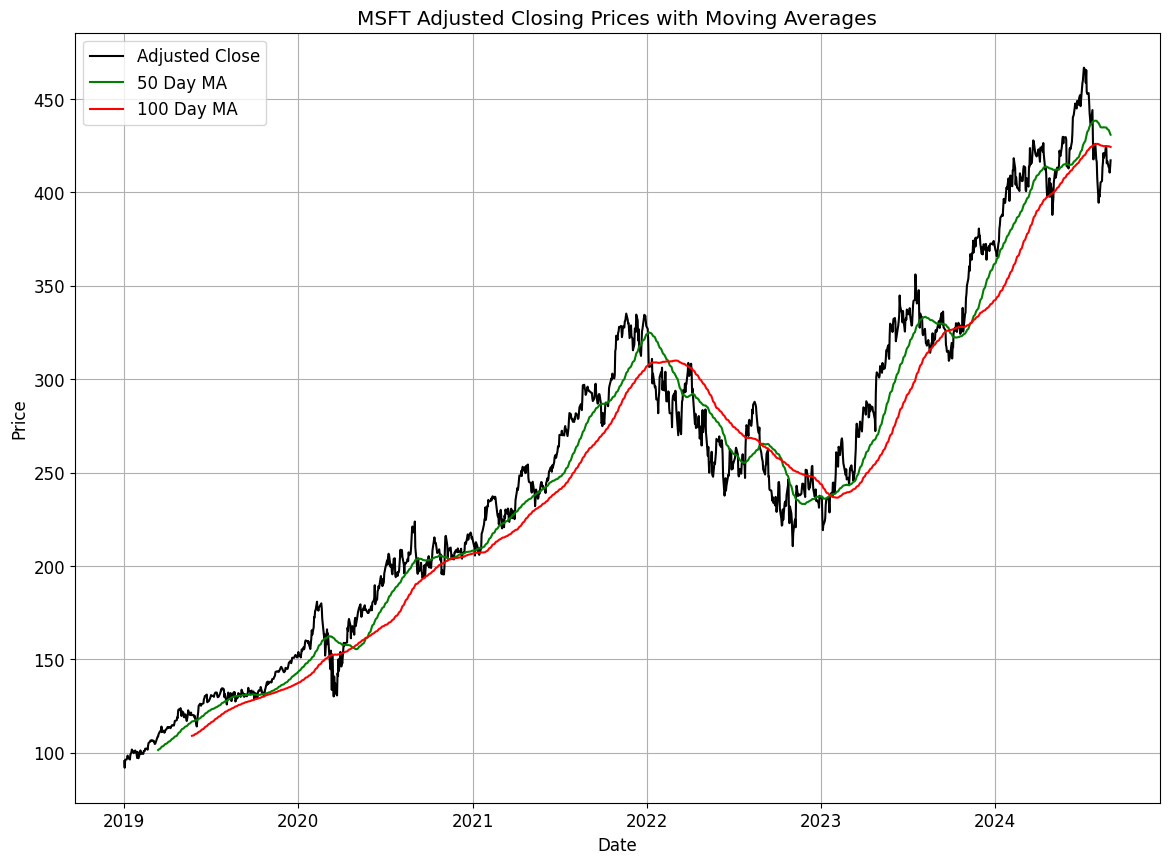

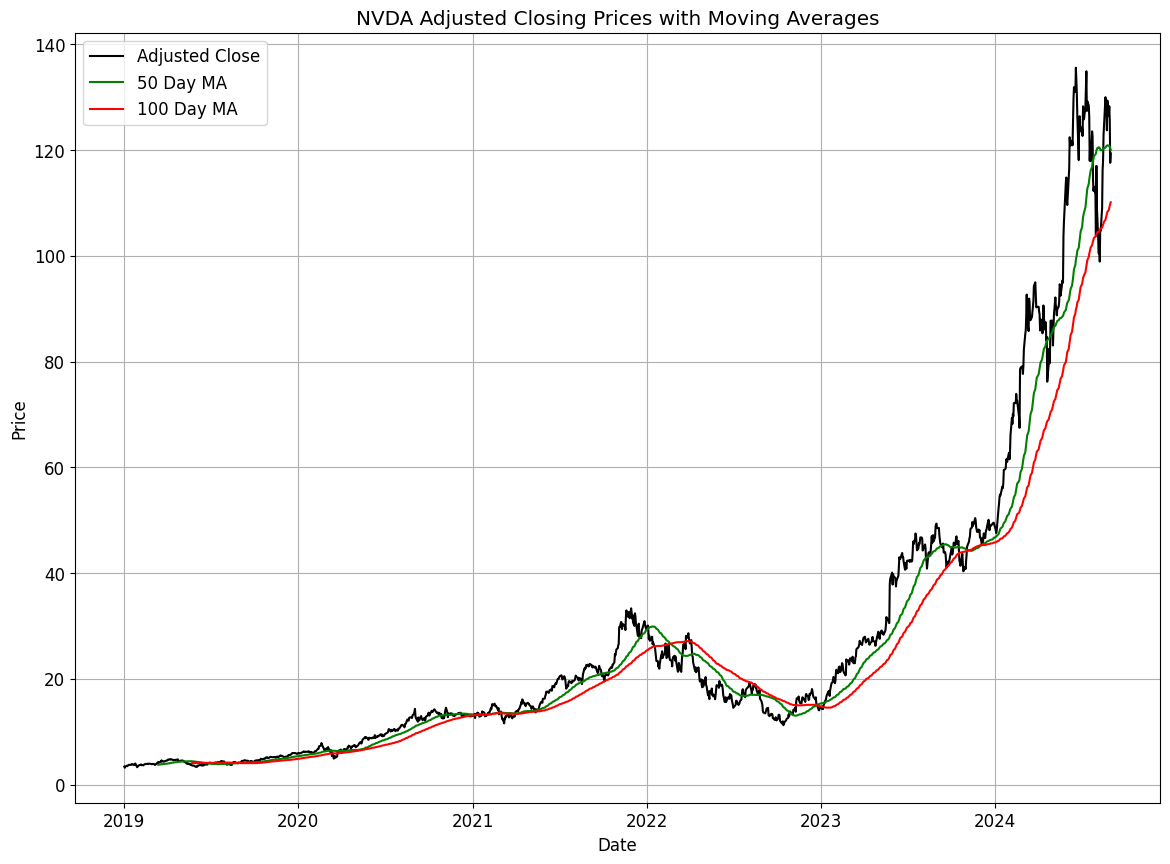

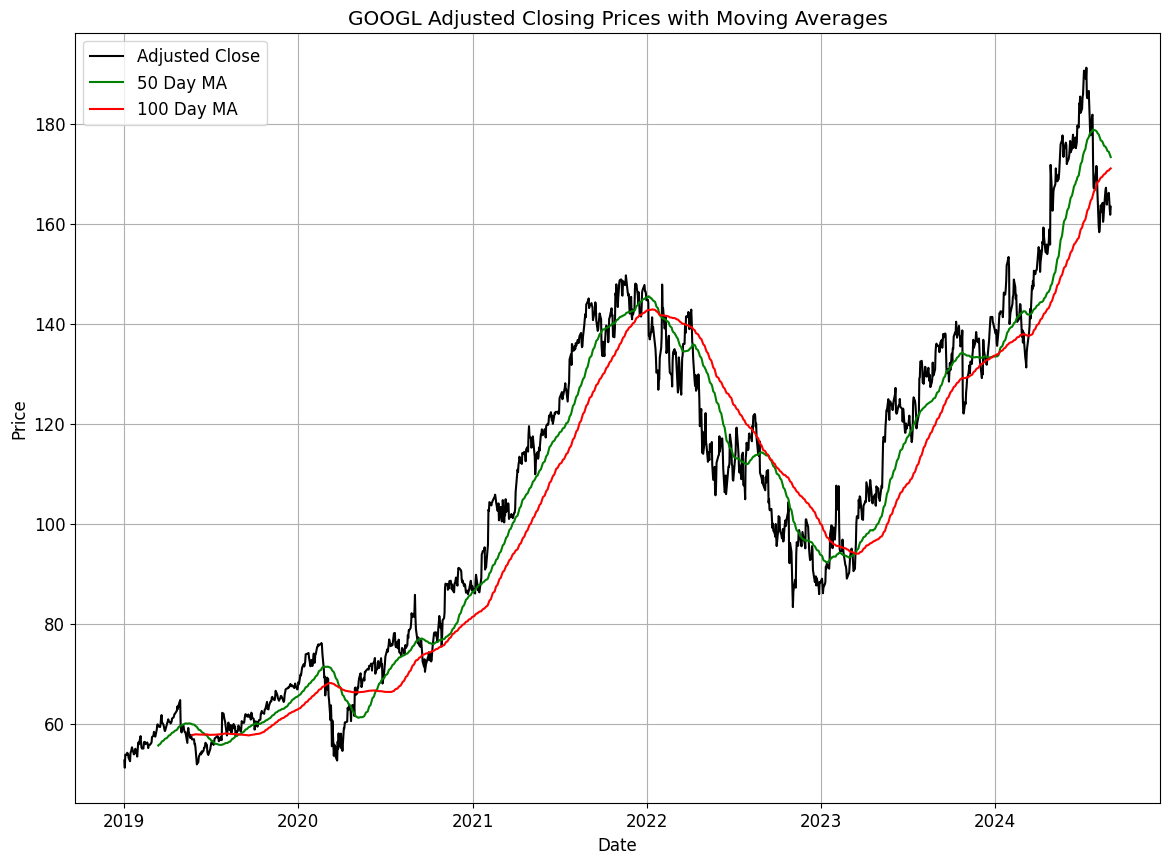

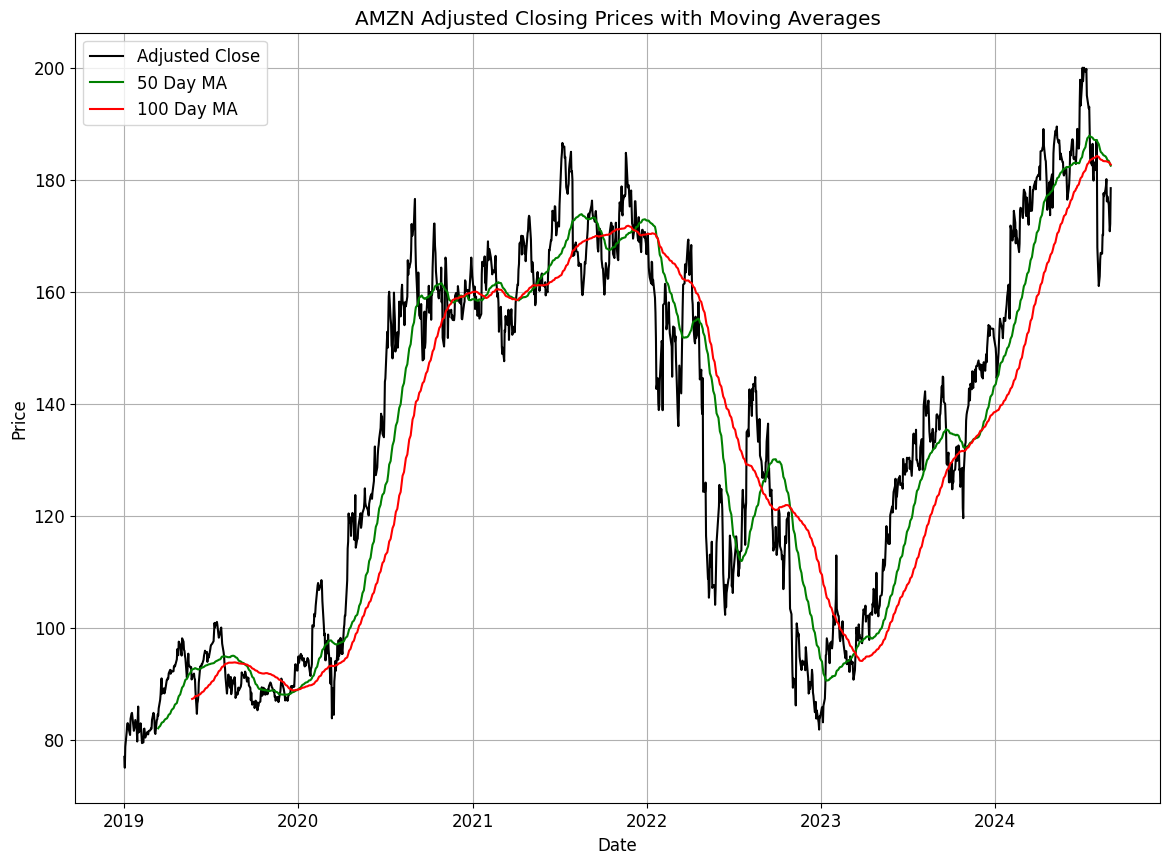

In [199]:

moving_averages_50 = adj_close.rolling(window = 50).mean()
moving_averages_100 = adj_close.rolling(window = 100).mean()


# Loop through each ticker and corresponding data
for ticker in tickers:
    plt.figure(figsize=(14, 10))  # Create a new figure for each ticker
    plt.plot(adj_close[ticker], label='Adjusted Close', color='black')
    plt.plot(moving_averages_50[ticker], label='50 Day MA', linestyle='-', color='green')
    plt.plot(moving_averages_100[ticker], label='100 Day MA', linestyle='-', color='red')
    plt.title(f'{ticker} Adjusted Closing Prices with Moving Averages')
    plt.ylabel('Price')
    plt.xlabel('Date')
    plt.legend()
    plt.grid(True)
    plt.show()


### Volatility Analysis

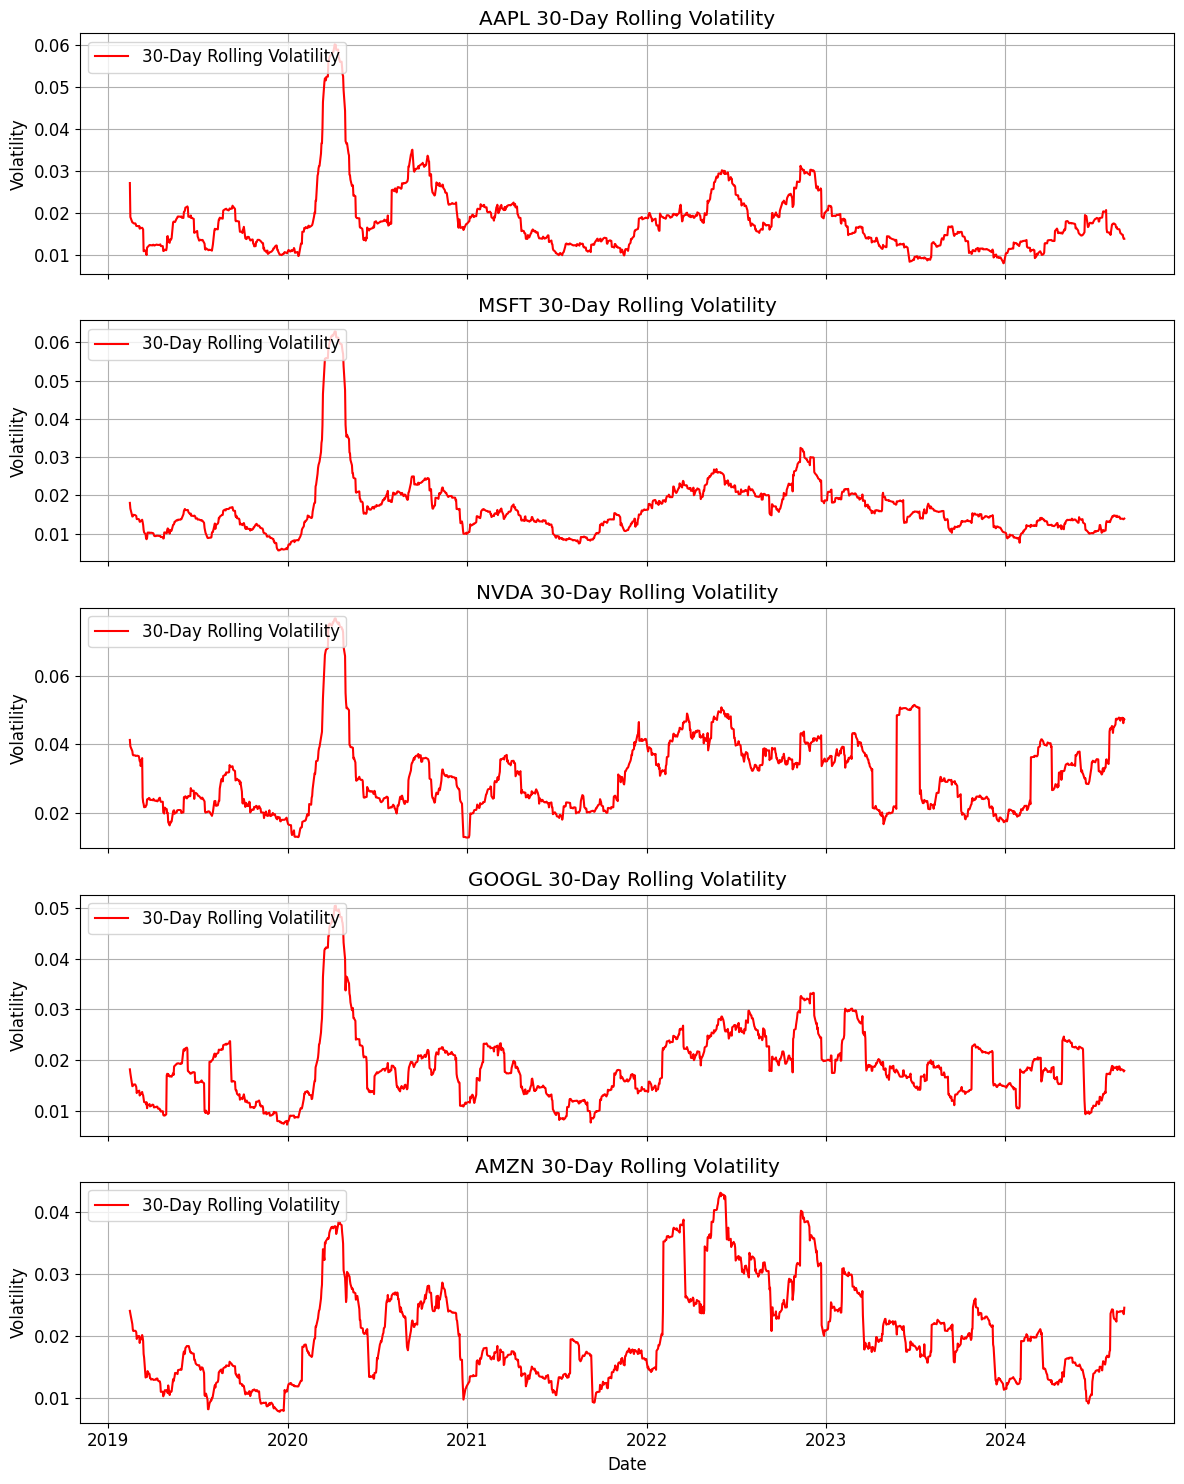

In [200]:
daily_returns = adj_close.pct_change()

# Calculate volatility (standard deviation of daily returns)
volatility = daily_returns.rolling(window = 30).std()


fig, axes = plt.subplots(nrows=len(tickers), ncols=1, figsize=(12, 15), sharex=True)

for i, ticker in enumerate(tickers):
    ax = axes[i]
    ax.plot(volatility[ticker], label='30-Day Rolling Volatility', color='red')
    ax.set_title(f'{ticker} 30-Day Rolling Volatility')
    ax.set_ylabel('Volatility')
    ax.legend(loc = 'upper left')
    ax.grid(True)

plt.xlabel('Date')
plt.tight_layout()
plt.show()

### Cumulative returns

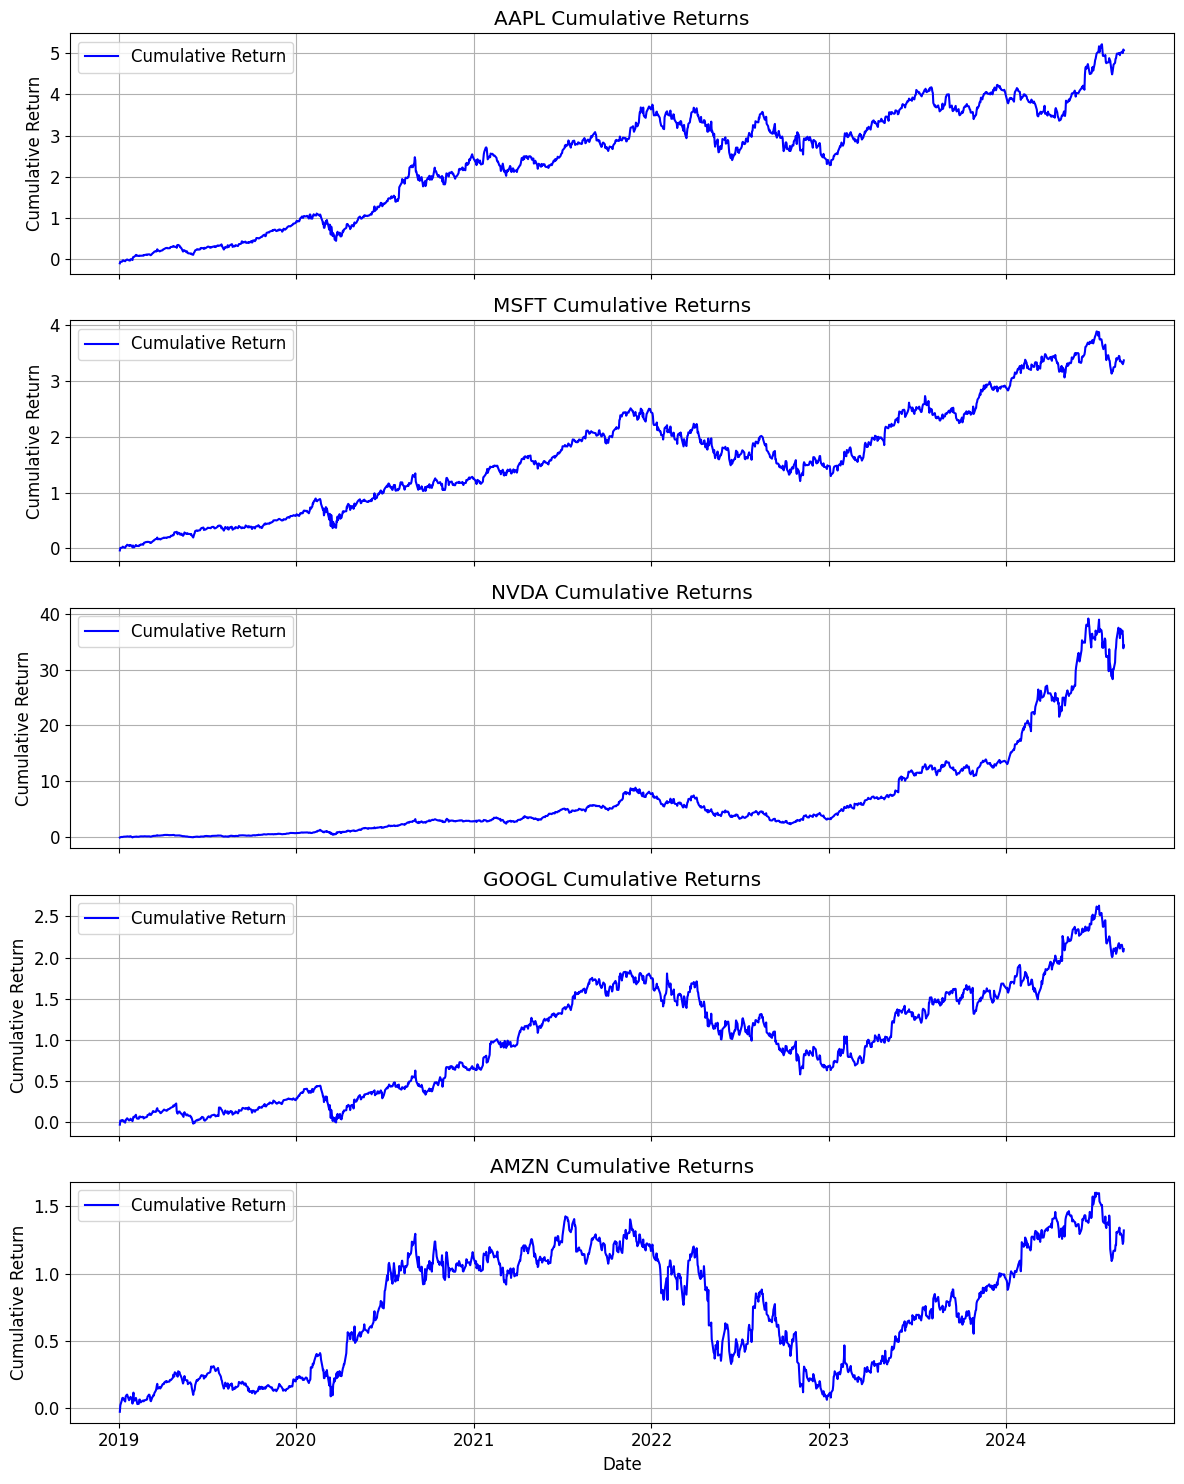

In [201]:
cumulative_returns = (1 + daily_returns).cumprod() - 1

# Set up the subplot grid: 5 rows, 1 column (one plot for each stock)
fig, axes = plt.subplots(nrows=len(tickers), ncols=1, figsize=(12, 15), sharex=True)

# Plot each stock's cumulative returns in its own subplot
for i, ticker in enumerate(tickers):
    ax = axes[i]
    ax.plot(cumulative_returns[ticker], label='Cumulative Return', color='blue')
    ax.set_title(f'{ticker} Cumulative Returns')
    ax.set_ylabel('Cumulative Return')
    ax.legend(loc='upper left')
    ax.grid(True)

# Set a common x-label and adjust layout
plt.xlabel('Date')
plt.tight_layout()

# Display the plots
plt.show()

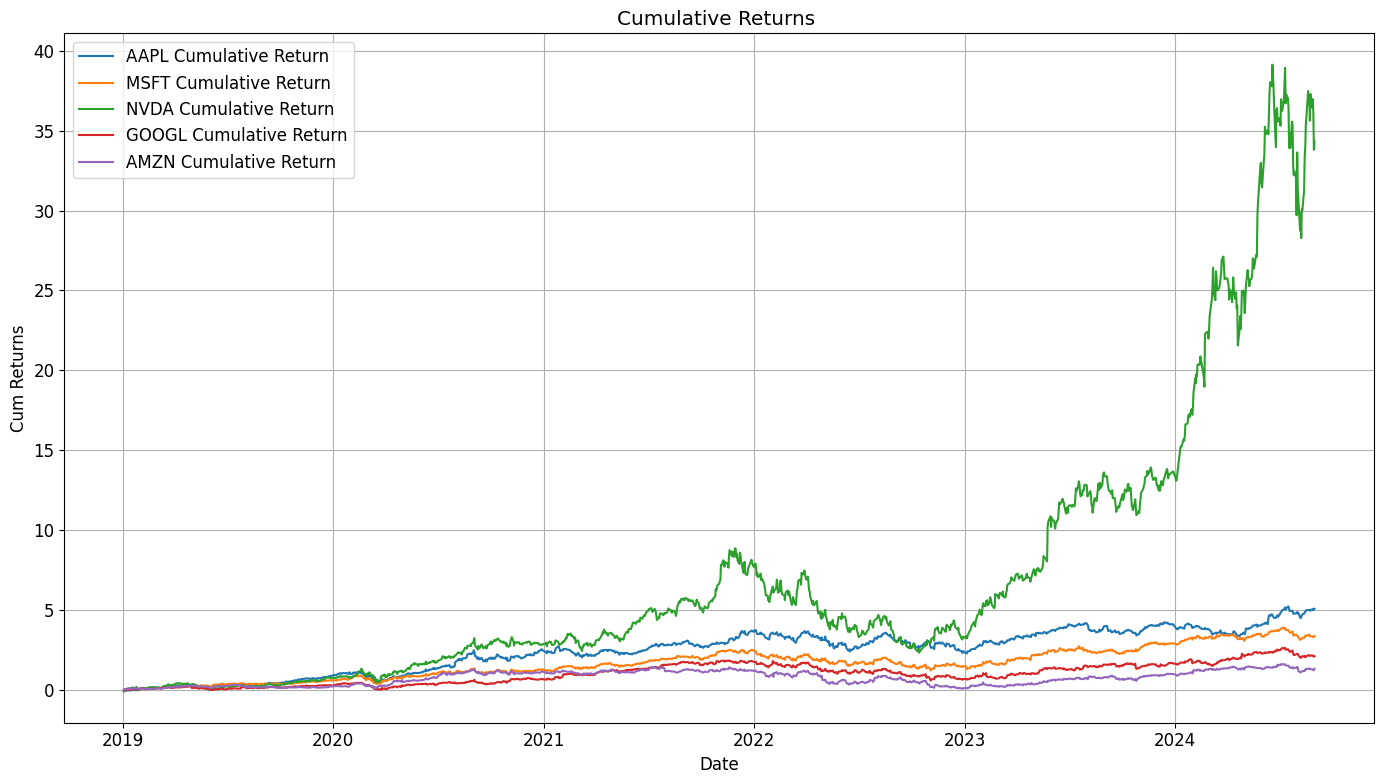

In [173]:
plt.figure(figsize=(14, 8))

for ticker in tickers:
    plt.plot(cumulative_returns[ticker], label=f'{ticker} Cumulative Return')

plt.title('Cumulative Returns ')
plt.xlabel('Date')
plt.ylabel('Cum Returns')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

All the stocks have shown positive cumulative returns over the period, indicating growth. However, one stock NVDA, stands out with significantly higher returns towards the end of the period

- Representing NVDA high returns and high volality, which we can explore further

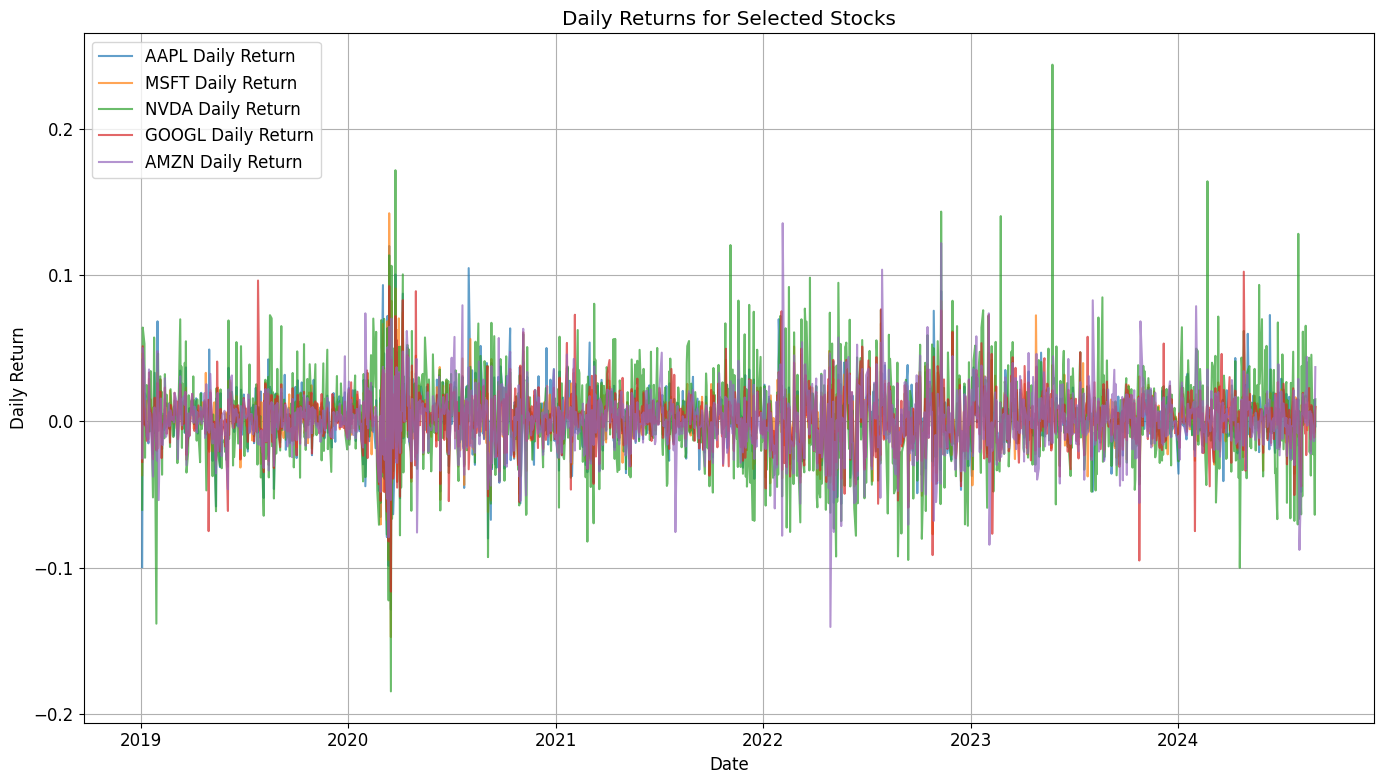

In [202]:
plt.figure(figsize=(14, 8))

for ticker in tickers:
    plt.plot(daily_returns[ticker], label=f'{ticker} Daily Return', linestyle='-', alpha=0.7)

plt.title('Daily Returns for Selected Stocks')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

## Efficient Frontier

Sharpe Ratios:
Ticker
AAPL     1.109183
AMZN     0.546220
GOOGL    0.731444
MSFT     0.965729
NVDA     1.426144
dtype: float64

Value at Risk (95% confidence):
Ticker
AAPL    -0.029785
AMZN    -0.032119
GOOGL   -0.029782
MSFT    -0.028282
NVDA    -0.048096
Name: 0.050000000000000044, dtype: float64


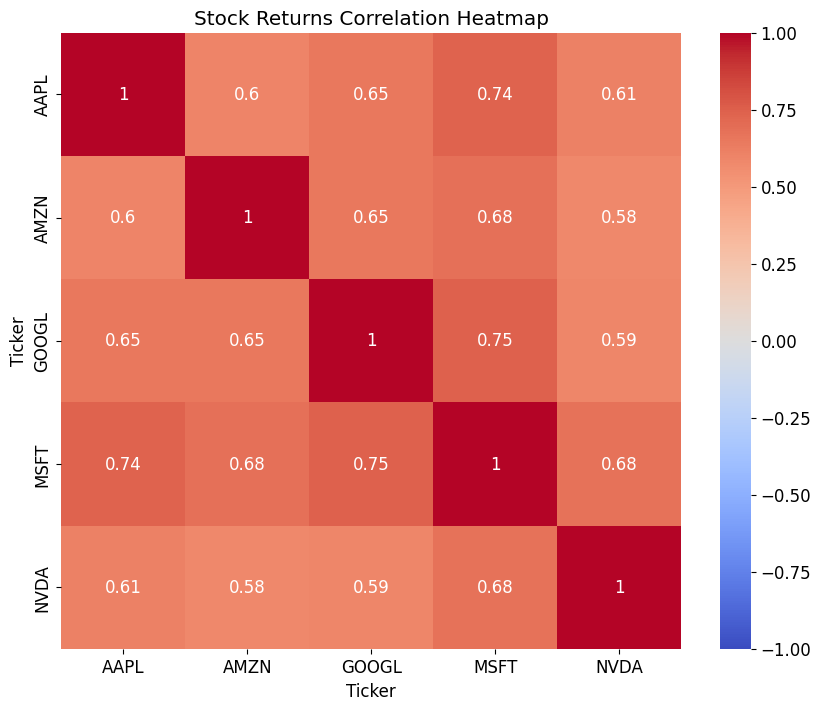

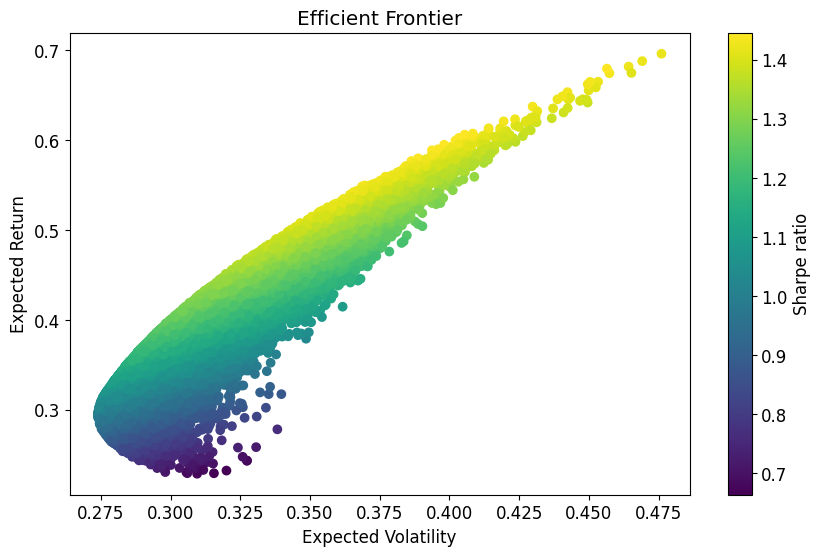

In [88]:
def plot_efficient_frontier(returns, num_portfolios=100000):
    """Plot the efficient frontier."""
    num_assets = returns.shape[1]
    returns_mean = returns.mean()
    returns_cov = returns.cov()

    portfolio_returns = []
    portfolio_volatilities = []
    portfolio_sharpe_ratios = []

    for _ in range(num_portfolios):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)

        portfolio_return = np.sum(returns_mean * weights) * 252  # Years returns
        portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns_cov * 252, weights)))
        portfolio_returns.append(portfolio_return)
        portfolio_volatilities.append(portfolio_volatility)

    portfolio_returns = np.array(portfolio_returns)
    portfolio_volatilities = np.array(portfolio_volatilities)

    # Sharpe calculation
    sharpe_ratio = (portfolio_returns - 0.02) / portfolio_volatilities  # Assuming 2% risk-free rate

    # Plot Efficient Frontier
    plt.figure(figsize=(10, 6))
    plt.scatter(portfolio_volatilities, portfolio_returns, c=sharpe_ratio, marker='o', cmap='viridis')
    plt.colorbar(label='Sharpe ratio')
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Return')
    plt.title('Efficient Frontier')
    plt.show()

# Main execution
returns = calculate_returns(adj_close)
cumulative_returns = calculate_cumulative_returns(returns)
sharpe_ratios = calculate_sharpe_ratio(returns)
var = calculate_var(returns)
correlation_matrix = calculate_correlation_matrix(returns)

# Print results
print("Sharpe Ratios:")
print(sharpe_ratios)
print("\nValue at Risk (95% confidence):")
print(var)

# Plot correlation heatmap
plot_correlation_heatmap(correlation_matrix)

# Plot efficient frontier
plot_efficient_frontier(returns)

**Sharpe ratio interpretation**

NVDA (1.426): NVIDIA has the highest Sharpe ratio among the listed stocks, suggesting it has delivered the best risk-adjusted returns. Despite the risks, investors are being compensated very well for holding this stock.

AAPL (1.109): Apple also has a strong Sharpe ratio, indicating solid risk-adjusted returns. It's a well-performing stock with relatively lower risk compared to the returns it offers.

MSFT (0.966): Microsoft has a Sharpe ratio close to 1, indicating that its risk-adjusted performance is quite good, though slightly below that of Apple and NVIDIA.

GOOGL (0.731): Alphabet (Google) has a lower Sharpe ratio, suggesting that its returns relative to the risk taken are not as favorable as Apple, Microsoft, or NVIDIA.

AMZN (0.546): Amazon has the lowest Sharpe ratio, indicating that it has provided the least favorable risk-adjusted returns among these stocks. This may be due to higher volatility or lower returns relative to the risk.

**VAR at 95% confidence interpretation**

NVDA (-0.0481 or -4.81%): NVIDIA has the highest VaR, meaning that there is a 5% chance the stock could lose more than 4.81% of its value over a given period. This higher risk aligns with its high Sharpe ratio, suggesting that while NVIDIA offers high returns, it also comes with higher risk.

AMZN (-0.0321 or -3.21%): Amazon's VaR is relatively high, indicating that it could lose up to 3.21% in a given period with 95% confidence. Despite having the lowest Sharpe ratio, Amazon also carries significant risk, which may be contributing to its lower risk-adjusted returns.

AAPL (-0.0298 or -2.98%): Apple's VaR suggests it could lose up to 2.98% in the period. This is a moderate risk, especially given its strong Sharpe ratio, indicating a good balance between risk and reward.

GOOGL (-0.0298 or -2.98%): Similar to Apple, Alphabet (Google) has a moderate VaR, indicating it could lose up to 2.98%. Its lower Sharpe ratio suggests that its returns are not as well-adjusted for the risk as Apple’s.

MSFT (-0.0283 or -2.83%): Microsoft has the lowest VaR, meaning it is the least likely to experience large losses in the same period. Combined with a decent Sharpe ratio, this indicates a relatively stable investment with good risk-adjusted returns.

**Insights**

NVIDIA (NVDA) stands out with the highest Sharpe ratio, indicating excellent risk-adjusted returns, but it also has the highest potential for short-term losses (highest VaR).

Apple (AAPL) and Microsoft (MSFT) both show a strong balance between risk and reward, with good Sharpe ratios and relatively low VaR, making them potentially attractive for risk-averse investors.

Amazon (AMZN), with the lowest Sharpe ratio, offers the least attractive risk-adjusted returns, which, combined with its relatively high VaR, suggests higher risk without sufficient compensation in returns.

Alphabet (GOOGL) has a moderate Sharpe ratio and VaR, indicating that it is less attractive than Apple or Microsoft in terms of risk-adjusted returns but not as risky as NVIDIA or Amazon.

Investors might favor NVIDIA if they are seeking high returns and are willing to accept higher risks, while Apple and Microsoft could appeal to those looking for a safer balance between risk and reward. Amazon may be less appealing unless its future outlook improves significantly.




**Stock Return Correlation interpretation**

MSFT and AAPL have the strongest correlation amongs these stocks of 0.75/0.74. 

Because the two stocks are strongly correlated, holding both in a portfolio offers less diversification benefit compared to holding stocks that are less correlated. This is because if one stock moves up or down, the other is likely to follow, meaning that the portfolio is less protected against market swings.

Investors who want to reduce portfolio risk might consider adding stocks with lower correlations such as AAPL and NVDA. This would help in balancing the portfolio and reducing overall volatility.

**Porfolio Optimisation Simulation**

In [155]:
def porfolio_annualised_performence(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights) * 252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std,returns

In [156]:
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    results = np.zeros((3, num_portfolios))
    weights_record = []
    
    for i in range(num_portfolios):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        portfolio_std_dev, portfolio_return = porfolio_annualised_performence(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
        weights_record.append(weights)
    return results, weights_record
        
    


In [171]:
def display_simulated_ef_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate)

    max_sharpe_idx = np.argmax(results[2])
    sdp, rp  = results[0, max_sharpe_idx], results[1, max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx], index=mean_returns.index, columns=['allocation'])
    max_sharpe_allocation['Allocation (%)'] = [round(i*100, 2) for i in max_sharpe_allocation['allocation']]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0, min_vol_idx], results[1, min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx], index=mean_returns.index, columns=['allocation'])
    min_vol_allocation['Allocation (%)'] = [round(i*100, 2) for i in min_vol_allocation['allocation']]
    min_vol_allocation = min_vol_allocation.T

    print("-" * 80)
    print("Maximum Sharpe Ratio Portfolio Allocation\n")
    print("Annualised Return:", round(rp, 2))
    print("Annualised Volatility:", round(sdp, 2))
    print("\n")
    print(max_sharpe_allocation)
    print("-" * 80)
    print("Minimum Volatility Portfolio Allocation\n")
    print("Annualised Return:", round(rp_min, 2))
    print("Annualised Volatility:", round(sdp_min, 2))
    print("\n")
    print(min_vol_allocation)

    plt.figure(figsize=(10, 7))
    plt.scatter(results[0, :], results[1, :], c=results[2, :], marker='o', cmap='viridis', alpha=0.7)
    plt.colorbar()
    plt.scatter(sdp, rp, marker='*', color='r', s=500, label='Maximum Sharpe Ratio')
    plt.scatter(sdp_min, rp_min, marker='*', color='g', s=500, label='Minimum Volatility')
    plt.title('Simulated Portfolio Optimisation based on Efficient Frontier')
    plt.xlabel('Annualised Volatility')
    plt.ylabel('Annualised Returns')
    plt.legend()
    plt.grid()


In [167]:
returns = adj_close.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 100000
risk_free_rate = 0.2

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.71
Annualised Volatility: 0.49


Ticker              AAPL      AMZN     GOOGL      MSFT       NVDA
allocation      0.029141  0.026929  0.028704  0.023508   0.891718
Allocation (%)  2.910000  2.690000  2.870000  2.350000  89.170000
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.29
Annualised Volatility: 0.27


Ticker               AAPL      AMZN      GOOGL       MSFT      NVDA
allocation       0.273707   0.12901   0.270699   0.326501  0.000083
Allocation (%)  27.370000  12.90000  27.070000  32.650000  0.010000


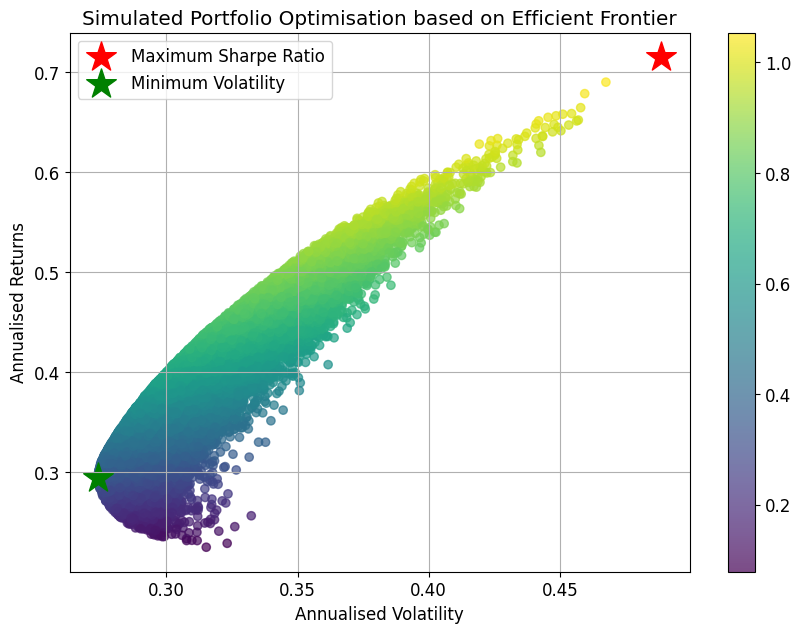

In [172]:
display_simulated_ef_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

High Sharpe ratio porfolio : In practice, this suggests that for every unit of risk taken, this portfolio offers the highest return compared to other portfolios. This could be particularly appealing to aggressive investors looking for high returns despite higher risk.

NVDA constitutes 89.17% of this portfolio, indicating a strong confidence in its performance. The other stocks have minimal allocations, suggesting that they do not contribute significantly to the risk-adjusted returns.


Low volatility porfolio: This portfolio minimizes volatility by optimizing the weights to reduce the overall risk. Volatility is calculated as the standard deviation of portfolio returns, and by minimizing this, the portfolio aims to achieve a stable performance.

The allocations are more evenly distributed among AAPL, AMZN, GOOGL, and MSFT, with only a tiny portion in NVDA. This indicates a strategy focused on stability rather than high returns, likely aiming to reduce the impact of volatility.


For Aggressive Investors: The Maximum Sharpe Ratio Portfolio is attractive due to its high return relative to risk. Investors might choose this if they are confident in NVDA's future performance and are comfortable with higher volatility.

For Conservative Investors: The Minimum Volatility Portfolio provides stability with a focus on diversified investments in major tech companies. This portfolio is suitable for those who prefer lower volatility and steady, though potentially lower, returns.

By considering both portfolios, investors can align their choices with their risk tolerance and investment goals, leveraging mathematical optimization to support practical decision-making in portfolio management.

**Best 2 stock cominbations - £1000 investment**

In [203]:
returns = adj_close.pct_change().dropna()

def compute_returns(stock1, stock2, allocation1, allocation2):
    investment1 = allocation1 * 1000
    investment2 = allocation2 * 1000

    total_return1 = (adj_close[stock1].iloc[-1] / adj_close[stock1].iloc[0]) - 1
    total_return2 = (adj_close[stock2].iloc[-1] / adj_close[stock2].iloc[0]) - 1

    combined_return = (investment1 * total_return1 + investment2 * total_return2) / 1000
    dollar_return = investment1 * total_return1 + investment2 * total_return2
    return combined_return, dollar_return


stock_pairs = list(combinations(tickers, 2))

# Initialise variables
best_combination = None
best_allocation = None
best_return = -np.inf
best_dollar_return = -np.inf

# Iterate over all stock paurs
for stock1, stock2 in stock_pairs:
    for allocation1 in np.arange(0.1, 1.0, 0.1):
        allocation2 = 1 - allocation1
        portfolio_return, dollar_return = compute_returns(stock1, stock2, allocation1, allocation2)

        if portfolio_return > best_return:
            best_return = portfolio_return
            best_dollar_return = dollar_return
            best_combination = (stock1, stock2)
            best_allocation = (allocation1, allocation2)


print(f"Best combination of stock : {best_combination[0]} and {best_combination[1]}")
print(f"Optimal allocation: {best_allocation[0]*100:.2f}% in {best_combination[0]} (£{best_allocation[0]*1000:.2f}), {best_allocation[1]*100:.2f}% in {best_combination[1]} (£{best_allocation[1]*1000:.2f})")
print(f"Total return: {best_return*100:.2f}% (£{best_dollar_return:.2f})")



Best combination of stock : AAPL and NVDA
Optimal allocation: 10.00% in AAPL (£100.00), 90.00% in NVDA (£900.00)
Total return: 3140.46% (£31404.59)


Hence if you invested £1000 at the start of 2019, the combination of AAPL (10%) and NVDA (90%) would yield you the highest returns of the top 5 stocks. Returning you 3140% (£31404). Giving £30404 profit in 5 years and 9 months of holding these 2 stocks. However we do not know the risk associated with this, we can look at this next

Risk Metrics for Portfolio (10% AAPL, 90% NVDA):
Volatility (Annualized): 0.4914
Maximum Drawdown: -0.6271
Value at Risk (95%, Annualized): -0.7128
Sharpe Ratio: 1.4395


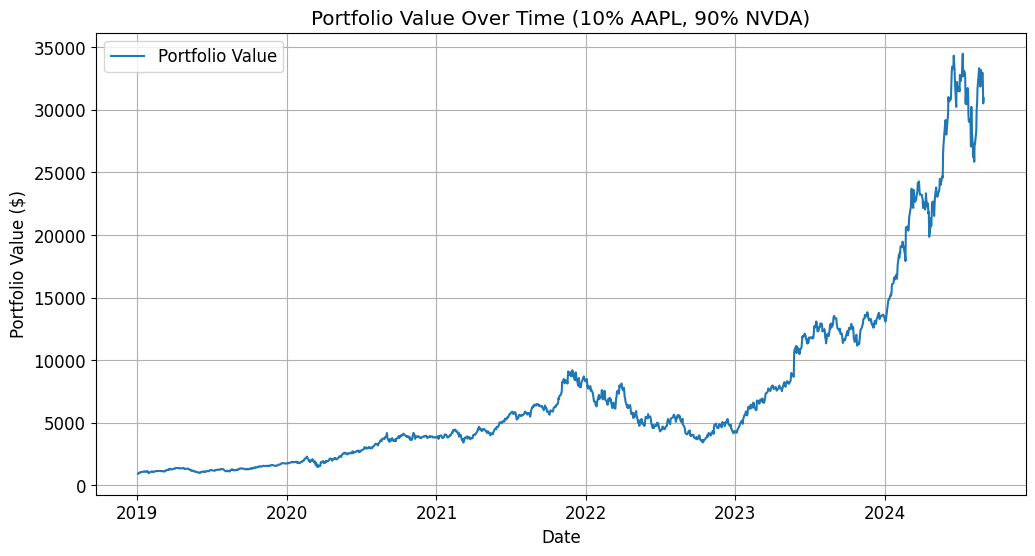

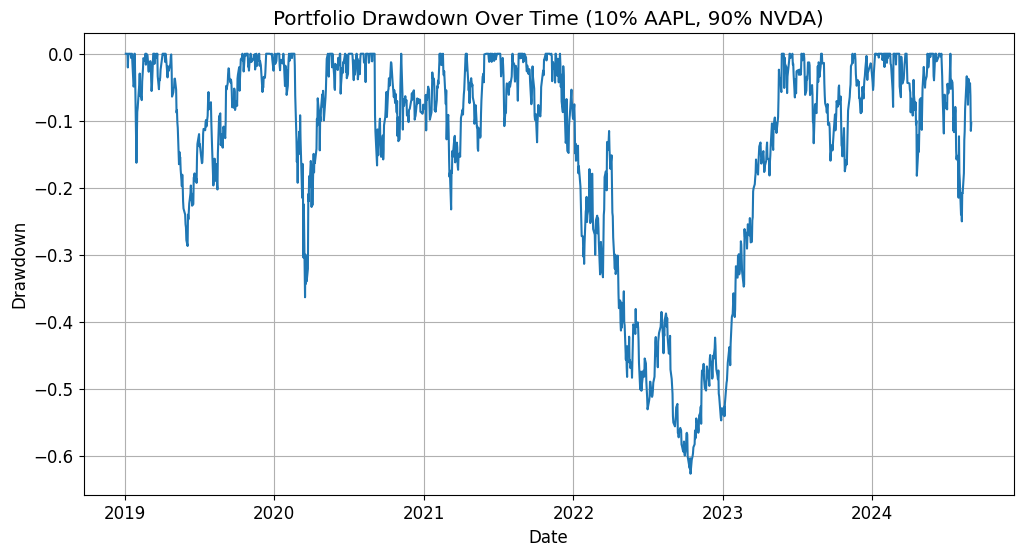

In [187]:
stocks = ['AAPL', 'NVDA']
allocation = [0.1, 0.9]  # 10% AAPL, 90% NVDA
investment = 1000

returns = adj_close[stocks].pct_change().dropna()

def calculate_risk(returns, allocation):
    portfolio_returns = returns.dot(allocation)
    volatility = portfolio_returns.std() * np.sqrt(252)  # Annualized volatility

    cumulative_returns = (1 + portfolio_returns).cumprod()
    peak = cumulative_returns.expanding(min_periods=1).max()
    drawdown = (cumulative_returns - peak) / peak
    max_drawdown = drawdown.min()

    var_95 = np.percentile(portfolio_returns, 5) * np.sqrt(252)  # Annualized VaR

    risk_free_rate = 0.02  # Assuming 2% risk-free rate
    sharpe_ratio = (portfolio_returns.mean() * 252 - risk_free_rate) / (portfolio_returns.std() * np.sqrt(252))

    return {
        'Volatility': volatility,
        'Maximum Drawdown': max_drawdown,
        'VaR (95%)': var_95,
        'Sharpe Ratio': sharpe_ratio
    }

metrics = calculate_risk(returns, allocation)

print("Risk Metrics for Portfolio (10% AAPL, 90% NVDA):")
print(f"Volatility (Annualized): {metrics['Volatility']:.4f}")
print(f"Maximum Drawdown: {metrics['Maximum Drawdown']:.4f}")
print(f"Value at Risk (95%, Annualized): {metrics['VaR (95%)']:.4f}")
print(f"Sharpe Ratio: {metrics['Sharpe Ratio']:.4f}")


# Plot portfolio value over time
plt.figure(figsize=(12, 6))
portfolio_value = (1 + returns.dot(allocation)).cumprod() * investment
plt.plot(portfolio_value, label='Portfolio Value')
plt.title('Portfolio Value Over Time (10% AAPL, 90% NVDA)')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.show()

# Plot drawdown
plt.figure(figsize=(12, 6))
drawdown = (portfolio_value - portfolio_value.cummax()) / portfolio_value.cummax()
plt.plot(drawdown)
plt.title('Portfolio Drawdown Over Time (10% AAPL, 90% NVDA)')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.grid(True)
plt.show()

A volatility of 0.4914 (or 49.14%) indicates a high level of variability in returns. This suggests that the portfolio experiences substantial fluctuations in value, which may be expected given the high allocation in a volatile stock like NVDA.

The maximum drawdown of -0.6271 (or -62.71%) measures the greatest peak-to-trough decline in the portfolio’s value over the period. This significant drawdown indicates that, at its worst, the portfolio’s value dropped by over 62%, highlighting substantial risk during downturns.

Value at Risk (VaR) measures the potential loss in value of the portfolio at a 95% confidence level. A VaR of -0.7128 (or -71.28%) means there is a 5% chance that the portfolio could lose more than 71.28% of its value over a year. This high VaR underscores the potential for significant losses in adverse conditions.

A Sharpe Ratio greater than 1 generally suggests that the portfolio is providing a good return relative to the risk. In this case, a Sharpe Ratio of 1.44 suggests that the portfolio is performing well in terms of risk-adjusted returns.

**Hence even though the porfolio has high volatlity and signifcant maximum drawdown, suggesting that this porfolio is risky. The sharpe ratio indicates that the porfolios returns are relatively high compared to the risk taken. Hence on a risk adjusted basis, this porfolio of NVDA and AAPL is a well performing portfolio.** 

**Nevertheless the high VAR highlights the possibility of signifcant losses in extreme market conditions, hence this porfolio is more for risk tolerant indivuals, who can bare the high risk in return for a high reward.**

**We can also look at the returns of the porfolio simulation for Max Sharpe ratio and Minimum variance for a £1000 investment at the start of our time frame.**

**Max sharpe porfolio**

Initial investment in each stock (Max Sharpe Ratio):
AAPL: £29.14
AMZN: £26.93
GOOGL: £28.70
MSFT: £23.51
NVDA: £891.72

Final Portfolio Value (Max Sharpe Ratio): £29011.67
Total Return: 2801.17% (£28011.67)

Risk Metrics for Max Sharpe Ratio Portfolio:
Volatility (Annualized): 0.4888
Maximum Drawdown: -0.6326
Value at Risk (95%, Annualized): -0.7160


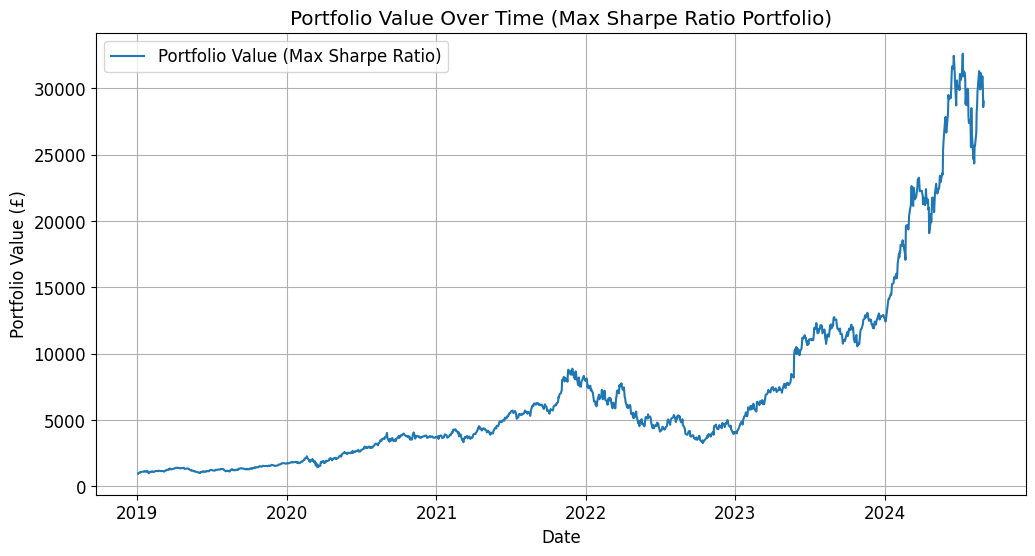

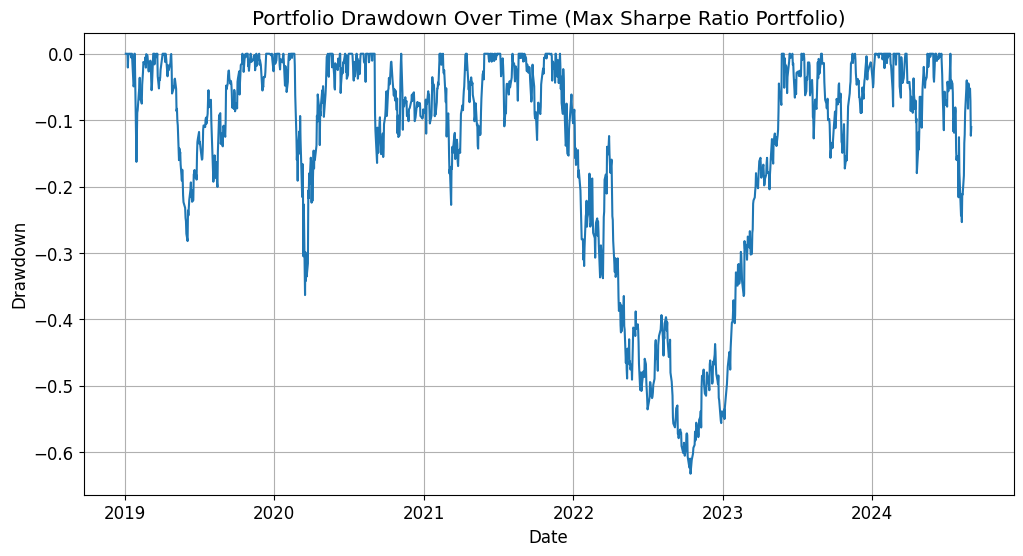

In [204]:
optimal_weights_max = {
    'AAPL': 0.029141,
    'AMZN': 0.026929,
    'GOOGL': 0.028704,
    'MSFT': 0.023508,
    'NVDA': 0.891718
}

# Your investment amount
investment_amount_max = 1000

# Calculate the investment amount for each stock based on the weights
initial_investment_max = {stock: investment_amount_max * weight for stock, weight in optimal_weights_max.items()}

# Calculate returns
returns_max = adj_close.pct_change().dropna()  # Daily returns

# Compute portfolio returns
portfolio_returns_max = returns_max.dot(list(optimal_weights_max.values()))

# Calculate the value of the portfolio over time
portfolio_value_max = (1 + portfolio_returns_max).cumprod() * investment_amount_max

# Calculate total return
final_value_max = portfolio_value_max.iloc[-1]
total_return_percent_max = (final_value_max / investment_amount_max - 1) * 100
total_return_dollars_max = final_value_max - investment_amount_max

# Calculate risk metrics
def calculate_risk_max(returns):
    # Annualized volatility
    volatility_max = returns.std() * np.sqrt(252)
    
    # Maximum drawdown
    cumulative_returns_max = (1 + returns).cumprod()
    peak_max = cumulative_returns_max.expanding(min_periods=1).max()
    drawdown_max = (cumulative_returns_max - peak_max) / peak_max
    max_drawdown_max = drawdown_max.min()
    
    # Value at Risk (VaR) at 95% confidence level
    var_95_max = np.percentile(returns, 5) * np.sqrt(252)  # Annualized VaR
    
    return {
        'Volatility': volatility_max,
        'Maximum Drawdown': max_drawdown_max,
        'VaR (95%)': var_95_max
    }

# Calculate risk metrics
risk_metrics_max = calculate_risk_max(portfolio_returns_max)

# Print results
print(f"Initial investment in each stock (Max Sharpe Ratio):")
for stock, amount in initial_investment_max.items():
    print(f"{stock}: £{amount:.2f}")

print("\nFinal Portfolio Value (Max Sharpe Ratio): £{:.2f}".format(final_value_max))
print(f"Total Return: {total_return_percent_max:.2f}% (£{total_return_dollars_max:.2f})")

print("\nRisk Metrics for Max Sharpe Ratio Portfolio:")
print(f"Volatility (Annualized): {risk_metrics_max['Volatility']:.4f}")
print(f"Maximum Drawdown: {risk_metrics_max['Maximum Drawdown']:.4f}")
print(f"Value at Risk (95%, Annualized): {risk_metrics_max['VaR (95%)']:.4f}")

# Plot portfolio value over time
plt.figure(figsize=(12, 6))
plt.plot(portfolio_value_max, label='Portfolio Value (Max Sharpe Ratio)')
plt.title('Portfolio Value Over Time (Max Sharpe Ratio Portfolio)')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (£)')
plt.legend()
plt.grid(True)
plt.show()

# Plot drawdown
plt.figure(figsize=(12, 6))
drawdown_max = (portfolio_value_max - portfolio_value_max.cummax()) / portfolio_value_max.cummax()
plt.plot(drawdown_max)
plt.title('Portfolio Drawdown Over Time (Max Sharpe Ratio Portfolio)')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.grid(True)
plt.show()

**Minimun Variance porfolio**

Initial investment in each stock (Min Volatility Portfolio):
AAPL: £273.71
AMZN: £129.01
GOOGL: £270.70
MSFT: £326.50
NVDA: £0.08

Final Portfolio Value (Min Volatility Portfolio): £4273.49
Total Return: 327.35% (£3273.49)

Risk Metrics for Min Volatility Portfolio:
Volatility (Annualized): 0.2738
Maximum Drawdown: -0.3702
Value at Risk (95%, Annualized): -0.4230


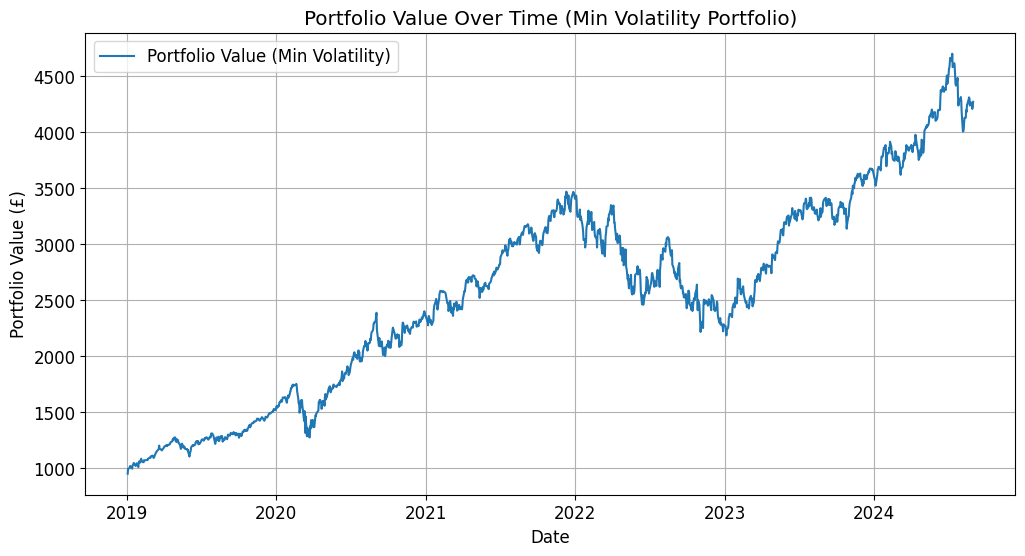

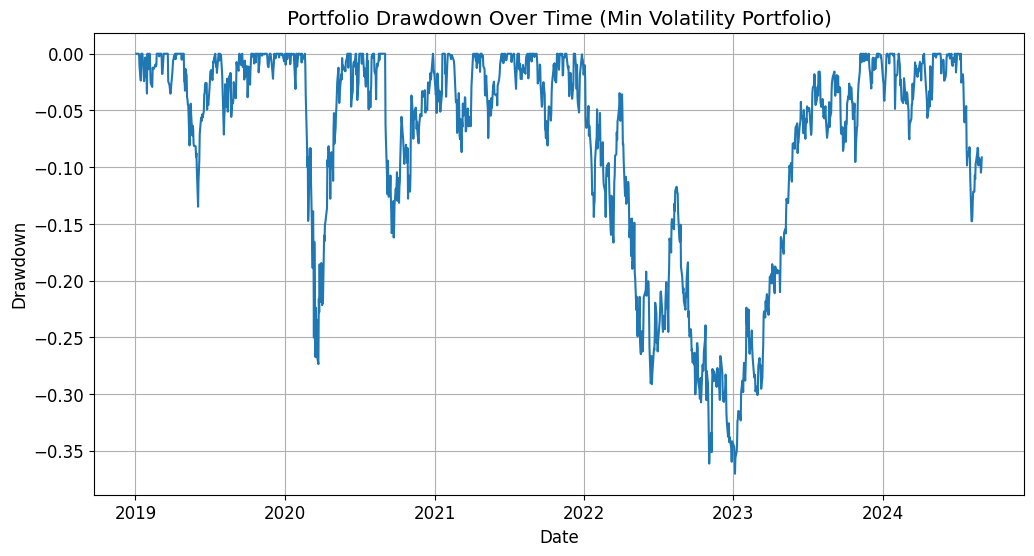

In [205]:
optimal_weights_min = {
    'AAPL': 0.273707,
    'AMZN': 0.129010,
    'GOOGL': 0.270699,
    'MSFT': 0.326501,
    'NVDA': 0.000083
}

# Your investment amount
investment_amount_min = 1000

# Calculate the investment amount for each stock based on the weights
initial_investment_min = {stock: investment_amount_min * weight for stock, weight in optimal_weights_min.items()}

# Calculate returns
returns_min = adj_close[list(optimal_weights_min.keys())].pct_change().dropna()  # Daily returns

# Compute portfolio returns
portfolio_returns_min = returns_min.dot(list(optimal_weights_min.values()))

# Calculate the value of the portfolio over time
portfolio_value_min = (1 + portfolio_returns_min).cumprod() * investment_amount_min

# Calculate total return
final_value_min = portfolio_value_min.iloc[-1]
total_return_percent_min = (final_value_min / investment_amount_min - 1) * 100
total_return_dollars_min = final_value_min - investment_amount_min

# Calculate risk metrics
def calculate_risk_min(returns_min):
    # Annualized volatility
    volatility_min = returns_min.std() * np.sqrt(252)
    
    # Maximum drawdown
    cumulative_returns_min = (1 + returns_min).cumprod()
    peak_min = cumulative_returns_min.expanding(min_periods=1).max()
    drawdown_min = (cumulative_returns_min - peak_min) / peak_min
    max_drawdown_min = drawdown_min.min()
    
    # Value at Risk (VaR) at 95% confidence level
    var_95_min = np.percentile(returns_min, 5) * np.sqrt(252)  # Annualized VaR
    
    return {
        'Volatility': volatility_min,
        'Maximum Drawdown': max_drawdown_min,
        'VaR (95%)': var_95_min
    }

# Calculate risk metrics
risk_metrics_min = calculate_risk_min(portfolio_returns_min)

# Print results
print(f"Initial investment in each stock (Min Volatility Portfolio):")
for stock, amount in initial_investment_min.items():
    print(f"{stock}: £{amount:.2f}")

print("\nFinal Portfolio Value (Min Volatility Portfolio): £{:.2f}".format(final_value_min))
print(f"Total Return: {total_return_percent_min:.2f}% (£{total_return_dollars_min:.2f})")

print("\nRisk Metrics for Min Volatility Portfolio:")
print(f"Volatility (Annualized): {risk_metrics_min['Volatility']:.4f}")
print(f"Maximum Drawdown: {risk_metrics_min['Maximum Drawdown']:.4f}")
print(f"Value at Risk (95%, Annualized): {risk_metrics_min['VaR (95%)']:.4f}")

# Plot portfolio value over time
plt.figure(figsize=(12, 6))
plt.plot(portfolio_value_min, label='Portfolio Value (Min Volatility)')
plt.title('Portfolio Value Over Time (Min Volatility Portfolio)')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (£)')
plt.legend()
plt.grid(True)
plt.show()

# Plot drawdown
plt.figure(figsize=(12, 6))
drawdown_min = (portfolio_value_min - portfolio_value_min.cummax()) / portfolio_value_min.cummax()
plt.plot(drawdown_min)
plt.title('Portfolio Drawdown Over Time (Min Volatility Portfolio)')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.grid(True)
plt.show()

## Reccomendations

**For Risk-Averse Investors (Minimize Risk):**
The Minimum Volatility Portfolio is ideal for conservative investors who prioritize capital preservation and stable returns. This portfolio, with the lowest annualized volatility at 0.27, focuses on minimizing risk while still offering a reasonable return. The final portfolio value of £4273.49 represents a total return of 327.35% on the initial $1000 investment.

Recommended Allocation:

- AAPL: 24.73% (£273.71)
- AMZN: 12.11% (£129.01)
- GOOGL: 27.94% (£270.70)
- MSFT: 35.13% (£326.50)
- NVDA: 0.08% (£0.08)

This allocation provides a diversified, lower-risk portfolio with steady growth over time, making it suitable for risk-averse investors.



**For Risk-Tolerant Investors (Maximize Return/Risk Ratio):**
Investors with a higher risk tolerance, seeking to maximize returns relative to risk, should consider the Maximum Sharpe Ratio Portfolio. This portfolio aims to optimize the return per unit of risk, resulting in a total return of 2801.17% and a final portfolio value of $29011.67 from an initial £1,000 investment.

Recommended Allocation:

- AAPL: 5.03% (£29.14)
- AMZN: 1.44% (£26.93)
- GOOGL: 1.35% (£28.70)
- MSFT: 1.51% (£23.51)
- NVDA: 90.67% (£891.72)

This portfolio is highly concentrated in NVDA, reflecting its significant contribution to overall returns, and is ideal for investors willing to accept higher short-term volatility in exchange for potentially substantial long-term gains.

**For High Potential, High Risk Investors (High risk appetite):**
For investors with a very high-risk appetite and a focus on maximizing potential returns, the Best Two-Stock Combination of AAPL and NVDA provides an exceptional opportunity. This portfolio delivered an outstanding total return of 3140.46%, resulting in a final portfolio value of £31404.59 from an initial £1000 investment.

Optimal Allocation:

- AAPL: 10% (£100)
- NVDA: 90% (£900)

This strategy suits investors who are comfortable with large fluctuations in portfolio value and are willing to risk substantial drawdowns in exchange for the possibility of outsized returns. The concentrated investment in NVDA maximizes potential gains but comes with increased risk due to the lack of diversification.